# Project 3: Modeling a Soccer Kick in Elastica
## By Bhargav Chandaka and Luke LaLonde 

In [2]:
%matplotlib notebook
import numpy as np
from elastica import *
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from leg_sim import *

### Running the Leg Simulation

In [3]:
leg_angle, foot_angle = 0, -np.pi/4
pp_list_torso, pp_list_straight_leg, pp_list_foot = run_leg_sim(leg_angle, foot_angle, dt=1e-4)

Total steps 10000


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2713.45it/s]

Final time of simulation is :  0.9999999999998981


### Visualizing the Starting Configuration

<IPython.core.display.Javascript object>


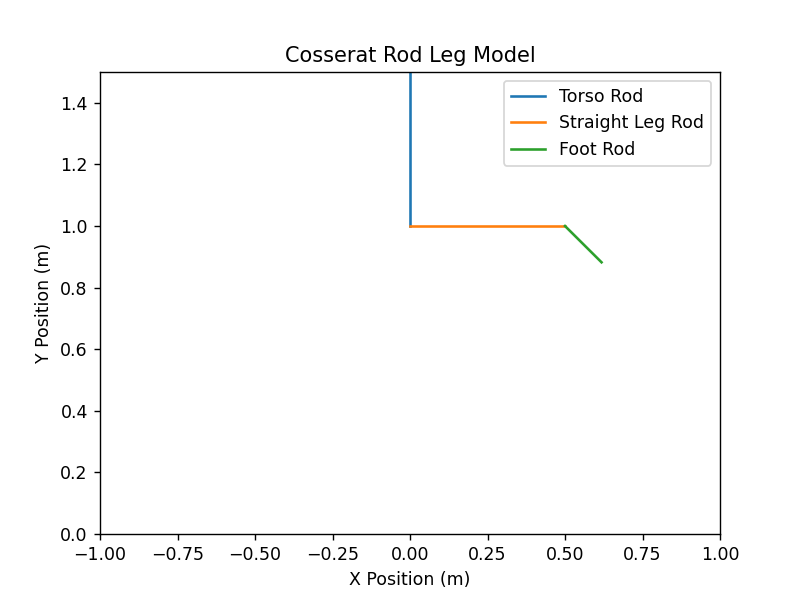

In [4]:
timestep = 0
x_vals_t, y_vals_t, z_vals_t = [pp_list_torso['position'][timestep][i] for i in range(3)]
x_vals_c, y_vals_c, z_vals_c = [pp_list_straight_leg['position'][timestep][i] for i in range(3)]
x_vals_f, y_vals_f, z_vals_f = [pp_list_foot['position'][timestep][i] for i in range(3)]

fig, ax = plt.subplots()
torso_line = ax.plot(x_vals_t, z_vals_t, label="Torso Rod")
straight_leg_line  = ax.plot(x_vals_c, z_vals_c, label="Straight Leg Rod")
foot_line  = ax.plot(x_vals_f, z_vals_f, label="Foot Rod")
ax.set_title("Cosserat Rod Leg Model")
ax.set_xlabel("X Position (m)")
ax.set_ylabel("Y Position (m)")
ax.set_xlim(-1,1)
ax.set_ylim(0,1.5)
ax.legend()
plt.show()

### Animating the Motion

<IPython.core.display.Javascript object>


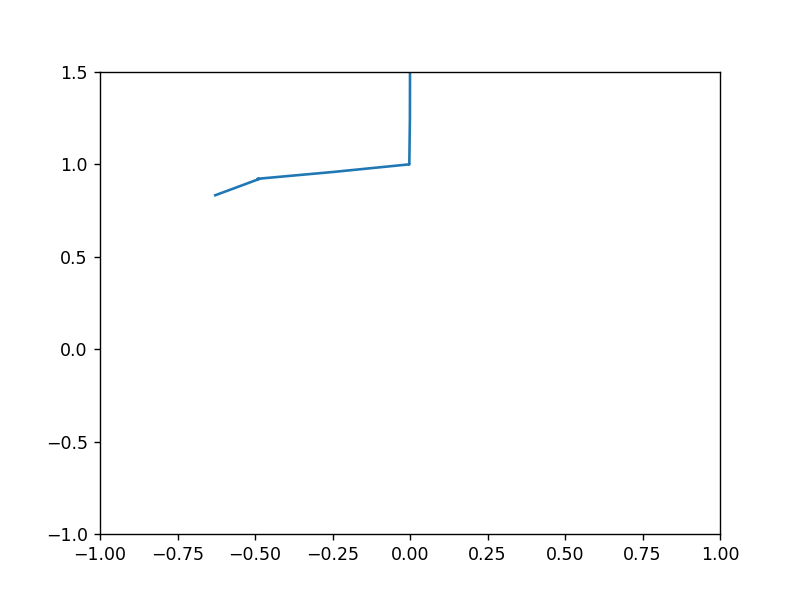

In [6]:
fig, ax = plt.subplots()
timestep = 0
x_vals, y_vals, z_vals = [pp_list_torso['position'][timestep][i] for i in range(3)]
x_vals, y_vals, z_vals = [np.append(vals, pp_list_straight_leg['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]
x_vals, y_vals, z_vals = [np.append(vals, pp_list_foot['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]

line, = ax.plot(x_vals, z_vals)
def animate(timestep):
#     line.remove()
    global line
    if timestep != len(pp_list_torso['position']) -1:
        line.remove()
    x_vals, y_vals, z_vals = [pp_list_torso['position'][timestep][i] for i in range(3)]
    x_vals, y_vals, z_vals = [np.append(vals, pp_list_straight_leg['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]
    x_vals, y_vals, z_vals = [np.append(vals, pp_list_foot['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]

    # line.set(np.sin(x + i / 50))  # update the data.
    line, = ax.plot(x_vals, z_vals)
    
    return line
ani = animation.FuncAnimation(
    fig, animate, interval=50)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1.5)
# ax.set(xlim3d=(-1, 1), xlabel='X')
    # ax.set(ylim3d=(-1, 1), ylabel='Y')
# ax.set(zlim3d=(-1, 1), zlabel='Z')
plt.show()

### Visualizing Torso End Node Positions

<IPython.core.display.Javascript object>


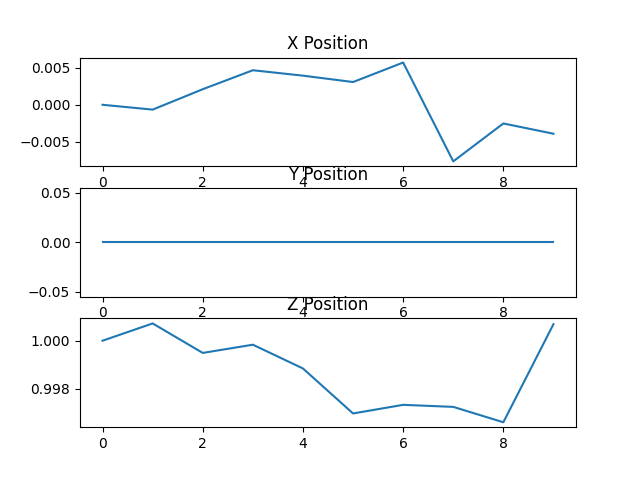

10


In [29]:
end_node_x = []
end_node_y = []
end_node_z = []

for timestep in range(max_timesteps):
    end_node_x.append(pp_list_torso['position'][timestep][0][-1])
    end_node_y.append(pp_list_torso['position'][timestep][1][-1])
    end_node_z.append(pp_list_torso['position'][timestep][2][-1])
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.plot(end_node_x)
ax1.set_title("X Position")
ax2.plot(end_node_y)
ax2.set_title("Y Position")
ax3.plot(end_node_z)
ax3.set_title("Z Position")

### Visualizing Straight Leg End Node Positions

<IPython.core.display.Javascript object>


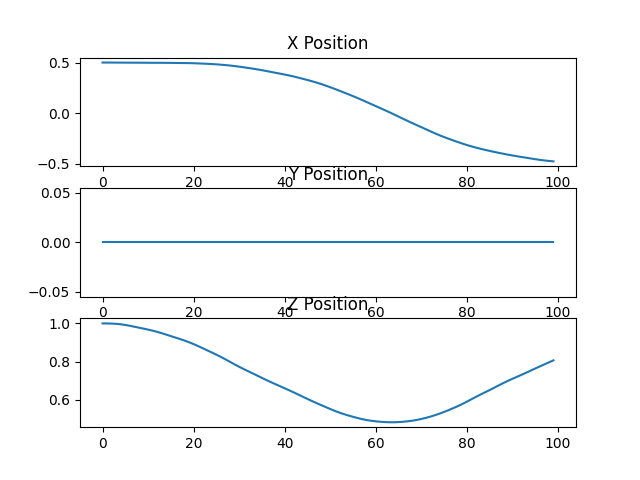

100


In [35]:
end_node_x = []
end_node_y = []
end_node_z = []

for timestep in range(max_timesteps):
    end_node_x.append(pp_list_straight_leg['position'][timestep][0][-1])
    end_node_y.append(pp_list_straight_leg['position'][timestep][1][-1])
    end_node_z.append(pp_list_straight_leg['position'][timestep][2][-1])
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.plot(end_node_x)
ax1.set_title("X Position")
ax2.plot(end_node_y)
ax2.set_title("Y Position")
ax3.plot(end_node_z)
ax3.set_title("Z Position")

### Visualizing Foot End Node Positions

<IPython.core.display.Javascript object>


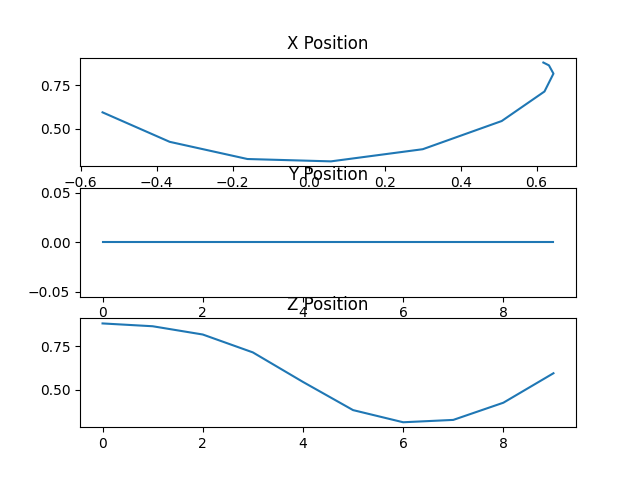

6
[[-2.07655218 -2.21501604 -2.31069737]
 [ 0.          0.          0.        ]
 [-0.26170415 -0.25593099 -0.24588283]]
2.3237428226169734


In [42]:
end_node_x = []
end_node_y = []
end_node_z = []

for timestep in range(max_timesteps):
    end_node_x.append(pp_list_foot['position'][timestep][0][-1])
    end_node_y.append(pp_list_foot['position'][timestep][1][-1])
    end_node_z.append(pp_list_foot['position'][timestep][2][-1])
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.plot(end_node_x, end_node_z)
ax1.set_title("X Position")
ax2.plot(end_node_y)
ax2.set_title("Y Position")
ax3.plot(end_node_z)
ax3.set_title("Z Position")
low_timestep = np.argmin(np.array(end_node_z))
print("Lowest Z-Value timestep:", low_timestep)
print("Lowest Z-Value Velocities:", pp_list_foot['velocity'][low_timestep])
max_foot_vel = np.linalg.norm(pp_list_foot['velocity'][low_timestep][:,-1])
print("Max Foot Vel:", max_foot_vel)

### 3d Animation

<IPython.core.display.Javascript object>


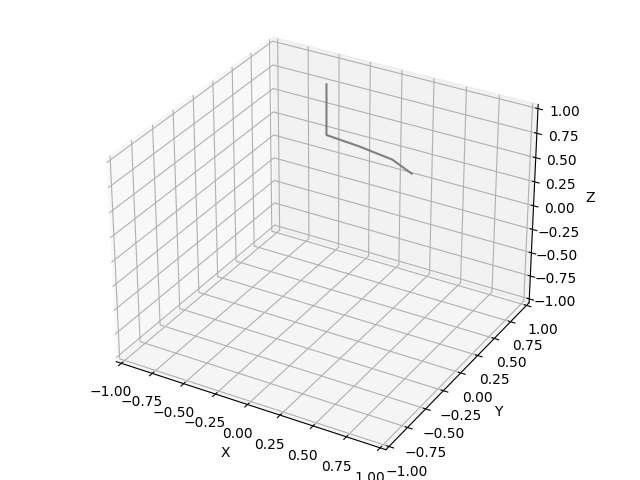

/tmp/ipykernel_1657/1601479406.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


In [36]:
fig = plt.figure()
ax = p3.Axes3D(fig)
x_vals, y_vals, z_vals = [pp_list_torso['position'][timestep][i] for i in range(3)]
x_vals, y_vals, z_vals = [np.append(vals, pp_list_straight_leg['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]
x_vals, y_vals, z_vals = [np.append(vals, pp_list_foot['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]

line, = ax.plot(x_vals, y_vals, z_vals)
def animate(timestep):
#     line.remove()
    global line
    if timestep != len(pp_list_torso['position']) -1:
        line.remove()
    x_vals, y_vals, z_vals = [pp_list_torso['position'][timestep][i] for i in range(3)]
    x_vals, y_vals, z_vals = [np.append(vals, pp_list_straight_leg['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]
    x_vals, y_vals, z_vals = [np.append(vals, pp_list_foot['position'][timestep][c]) for c, vals in enumerate([x_vals, y_vals, z_vals])]

    # line.set(np.sin(x + i / 50))  # update the data.
    line, = ax.plot(x_vals, y_vals, z_vals)
    
    return line
ani = animation.FuncAnimation(
    fig, animate, interval=50)
ax.set(xlim3d=(-1, 1), xlabel='X')
ax.set(ylim3d=(-1, 1), ylabel='Y')
ax.set(zlim3d=(-1, 1), zlabel='Z')
plt.show()